In [1]:
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
import dask_image.imread
x = dask_image.imread.imread('./data/flower_images/*.png')

In [3]:
x

,Array,Chunk
Bytes,13.76 MB,65.54 kB
Shape,"(210, 128, 128, 4)","(1, 128, 128, 4)"
Count,630 Tasks,210 Chunks
Type,uint8,numpy.ndarray


In [4]:
import dask.array as da
h, bins = da.histogram(x, bins=10, range=[0, 10000])

In [5]:
bins

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000.])

In [6]:
h.compute()

array([13870080,        0,        0,        0,        0,        0,
              0,        0,        0,        0], dtype=int64)

In [7]:
type(x)

dask.array.core.Array

def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) +
              (rgb[..., 1] * 0.7154) +
              (rgb[..., 2] * 0.0721))
    return result

In [8]:
def grayscale(cmyk):
    c = cmyk[..., 0]
    m = cmyk[..., 1]
    y = cmyk[..., 2]
    k = cmyk[..., 3]
    c = c * (1 - k) + k
    m = m * (1 - k) + k
    y = y * (1 - k) + k

    r, g, b = (1 - c), (1 - m), (1 - y)
    y = 0.299 * r + 0.587 * g + 0.114 * b
    #y = grayrgb(y)
    return y

def grayrgb(rgb):
    print(rgb[..., 0][1])
    result = ((rgb[..., 0] * 1.0) +
              (rgb[..., 1] * 1.0) +
              (rgb[..., 2] * 1.0) +
              (rgb[..., 3] * 100.0))
    return result

In [9]:
import numpy as np

In [10]:
np.ones((128, 4))[:, 0].shape

(128,)

def grayscale(rgb):
    print(rgb[..., 0][1])
    result = ((rgb[..., 0] * 1.0) +
              (rgb[..., 1] * 1.0) +
              (rgb[..., 2] * 1.0) +
              (rgb[..., 3] * 100.0))
    return result

def grayscale(rgb):
    result = np.dot(rgb[..., :4], [0.2989, 0.5870, 0.1140])
    return result

def grayscale(cmyk):
    print(cmyk)
    for x in cmyk:
        cmyk[x] = cmyk[x] * 0.5
    #result = ((cmyk[..., 0] * 0.5) +
    #          (cmyk[..., 1] * 0.5) +
    #          (cmyk[..., 2] * 0.5) +
    #          (cmyk[..., 3] * 0.5))
    return result

In [11]:
single_image_result = grayscale(x[0])
print(single_image_result)
single_image_result.visualize()

dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
dask.array<add, shape=(128,), dtype=float64, chunksize=(128,), chunktype=numpy.ndarray>


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.954944 to fit


In [12]:
x[0]

dask.array<getitem, shape=(128, 128, 4), dtype=uint8, chunksize=(128, 128, 4), chunktype=numpy.ndarray>

In [13]:
x[0][..., 0][0][120].compute()

133

In [16]:
grayscale(x[0, ...])

dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


dask.array<add, shape=(128,), dtype=float64, chunksize=(128,), chunktype=numpy.ndarray>

In [17]:
x[0, ...]

dask.array<getitem, shape=(128, 128, 4), dtype=uint8, chunksize=(128, 128, 4), chunktype=numpy.ndarray>

dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


TypeError: Invalid shape (128,) for image data

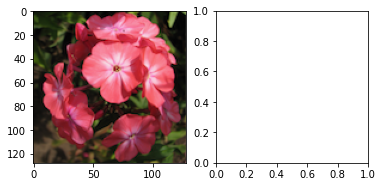

In [15]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
ax0.imshow(x[0, ...])            # display the first (and only) frame of the image
#ax1.imshow(single_image_result)#, cmap='gray'
ax1.imshow(grayscale(x[0, ...]))

In [18]:
from dask_image import ndfilters

smoothed = ndfilters.gaussian_filter(x, sigma=[0, 1, 1, 1])
#smoothed = ndfilters.gaussian_filter(single_image_result, sigma=[1, 1])

In [19]:
absolute_threshold = smoothed > 160

In [20]:
%gui qt

In [21]:
#conda install -c conda-forge napari

In [22]:
#import napari

#viewer = napari.Viewer()
#viewer.add_image(absolute_threshold)
#viewer.add_image(x, contrast_limits=[0, 2000])

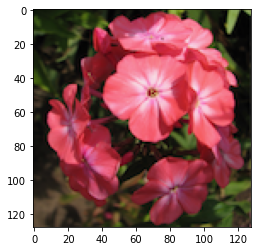

In [23]:
plt.imshow(x[0])

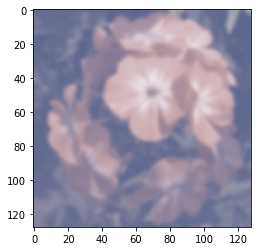

In [24]:
plt.imshow(smoothed[0])

In [25]:
threshold_value = 0.75 * da.max(single_image_result).compute()
print(threshold_value)

19156.213499999998


TypeError: Invalid shape (128,) for image data

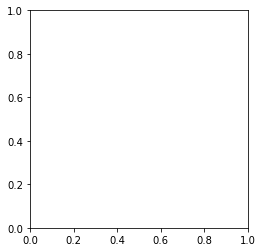

In [26]:
threshold_image = single_image_result > threshold_value
plt.imshow(threshold_image) #, cmap='gray'

In [ ]:
#flight_subset = x[x.carrier.isin(['AA', 'US', 'OH'])]
#flight_subset.hvplot.hist('depdelay', by='carrier', bins=20, bin_range=(-20, 100), width=300, subplots=True)

In [ ]:
import dask.dataframe as dd
df = dd.read_csv('./flower_images/flower_labels.csv')

In [ ]:
df.head(10)

In [ ]:
list(df.columns[1:2])

In [ ]:
dfLabels = list(df.columns[1:2])
df[dfLabels].compute()

In [ ]:
h, bins = da.histogram(df[dfLabels], bins=10, range=[0, 10])

In [ ]:
bins

In [ ]:
h.compute()

In [ ]:
plt.plot(h.compute())

In [ ]:
plt.bar(range(len(h.compute())),h.compute())

In [ ]:
plt.barh(range(len(h.compute())),h.compute())

In [ ]:

# define window size, output and axes
fig, ax = plt.subplots(figsize=[8,6])

# set plot title
ax.set_title("Some title")

# set x-axis name
ax.set_xlabel("X-Label")

# set y-axis name
ax.set_ylabel("Y-Label")

# create histogram within output
N, bins, patches = ax.hist(h.compute(), bins=bins, color="#777777") #initial color of all bins

# Iterate through all histogram elements
# each element in this interation is one patch on the histogram, where:
# - bin_size - number of records in current bin
# - bin - value of current bin (x-axis)
# - patch - a rectangle, object of class matplotlib.patches.Patch
# more details on patch properties: [visit this link][1]
#for bin_size, bin, patch in zip(N, bins, patches):
#    if bin_size == <some number>:
#        patch.set_facecolor("<some color like #FF000>")
#        patch.set_label("something")=
plt.show()